# <center> Exploration des données

Ce notebook contient le code utilisé pour produire les résultats de la partie 1 du rapport.

## Imports

In [1]:
import json
import yaml
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from wordcloud.wordcloud import colormap_color_func

## Chargement des données

In [2]:
tags = yaml.safe_load(open("data/tokens.yml", "r"))
entities = json.load(open("data/entities.json"))

In [3]:
all_tags = [v["start"] for v in tags.values()]
tags_to_cat_name = {v["start"]: k for k, v in tags.items()}

def lines_to_list(lines):
    return lines.split("\n")

def line_to_infos(line):
    all_tags_str = "".join(all_tags)
    pattern = rf"[{all_tags_str}].*?(?=(?:[{all_tags_str}])|$)"
    infos = {}
    infos_in_lines = re.findall(pattern, line)
    for info in infos_in_lines:
        token = info[0]
        text = info[1:].strip()
        infos[tags_to_cat_name[token]]=text
    return infos

In [4]:
def entities_to_df(entities):
    lines_data = []
    for lines in entities.values():
        lines_data.extend(lines_to_list(lines))
        
    data = []
    for line_data in lines_data:
        data.append(line_to_infos(line_data))
    return pd.DataFrame(data).dropna(how="all", ignore_index=True)

df = entities_to_df(entities)
df.shape

(25075, 12)

# Statistiques descriptives

### Nombre de documents et de lignes

In [5]:
print(f"There are {len(entities)} documents")
print(sum([lines.strip().count("\n")+1 for lines in entities.values()]), "lines")

There are 1218 documents
25448 lines


### Statistiques de répartitions sur les données

In [6]:
df.describe()

,surname,firstname,occupation,age,civil_status,nationality,surname_household,link,birth_date,lob,employer,observation
count,19159,24931,16179,16436,10705,13314,5640,20736,7344,9236,2911,602
unique,8120,2456,2056,253,6,73,4126,937,158,2923,1087,310
top,idem,Marie,idem,2,Garçon,française,Martin,chef,1901,idem,patron,idem
freq,669,2758,3695,337,2824,7916,29,3022,138,3378,644,88


In [7]:
print("Longeur moyenne de chaque tag :")
for col in df.columns :
    print(col, df[col].str.len().mean())

Longeur moyenne de chaque tag :
surname 7.166918941489639
firstname 6.994946051101039
occupation 7.91043945855739
age 1.964346556339742
civil_status 7.818215787015413
nationality 7.285939612438035
surname_household 7.3673758865248224
link 7.206066743827161
birth_date 3.997821350762527
lob 7.756279774794283
employer 7.299896942631398
observation 9.827242524916944


In [8]:
print("Fréquence de chaque tag :")
df.count() / len(df)

Fréquence de chaque tag :


surname              0.764068
firstname            0.994257
occupation           0.645224
age                  0.655474
civil_status         0.426919
nationality          0.530967
surname_household    0.224925
link                 0.826959
birth_date           0.292881
lob                  0.368335
employer             0.116092
observation          0.024008
dtype: float64

### Valeurs les plus fréquentes des tags `occupation` et `link`

Text(0, 0.5, 'Fréquence')

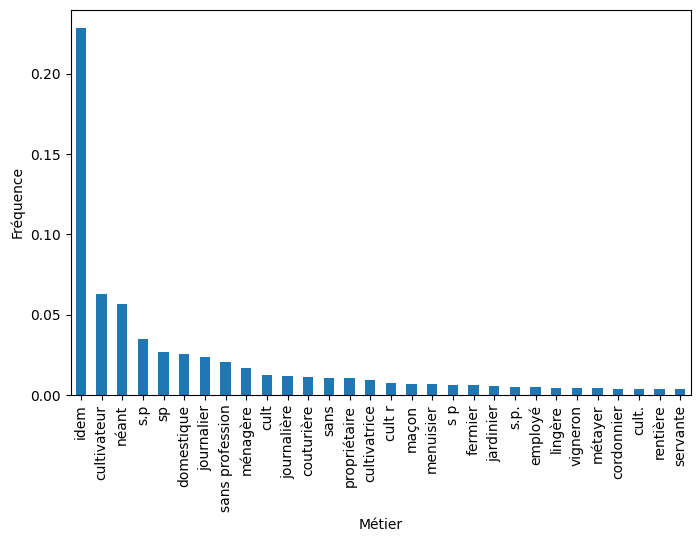

In [9]:
ax = df.occupation.value_counts(normalize=True).iloc[:30].plot(kind="bar", figsize=(8, 5))
ax.set_xlabel("Métier")
ax.set_ylabel("Fréquence")

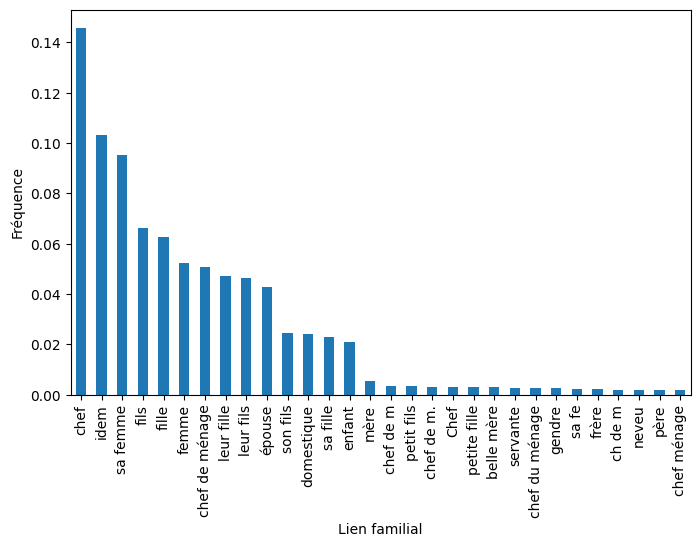

In [10]:
ax = df.link.value_counts(normalize=True).iloc[:30].plot(kind="bar", figsize=(8, 5))
ax.set_xlabel("Lien familial")
ax.set_ylabel("Fréquence")
plt.show()

### Wordclouds des prénoms

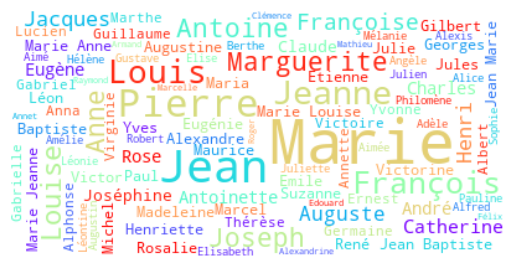

In [11]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", color_func=colormap_color_func("rainbow")).generate_from_frequencies(Counter(df.firstname.dropna().astype(str).str.strip().tolist()))#.generate(" ".join(df.firstname.dropna().astype(str).tolist()))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

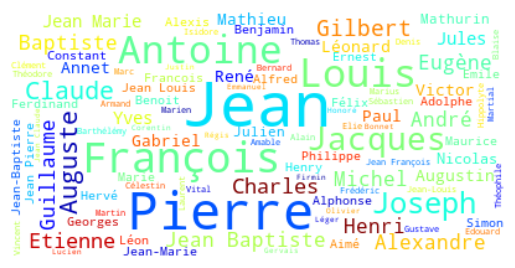

In [12]:
wordcloud_men = WordCloud(max_font_size=50, max_words=100, background_color="white", color_func=colormap_color_func("jet")).generate_from_frequencies(Counter(df.loc[df.civil_status.isin(['Garçon', 'Homme marié', 'Veuf'])].firstname.dropna().astype(str).str.strip().tolist()))#.generate(" ".join(df.loc[df.civil_status.isin(['Garçon', 'Homme marié', 'Veuf'])].firstname.dropna().astype(str).tolist()))
plt.figure()
plt.imshow(wordcloud_men, interpolation="bilinear")
plt.axis("off")
plt.show()

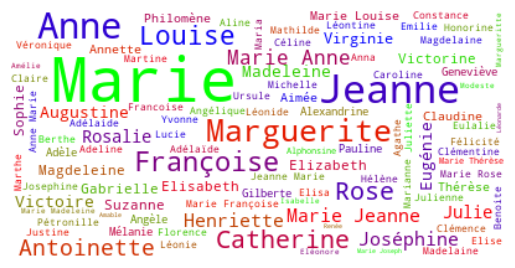

In [13]:
wordcloud_women = WordCloud(max_font_size=50, max_words=100, background_color="white", color_func=colormap_color_func("brg")).generate_from_frequencies(Counter(df.loc[df.civil_status.isin(['Fille', 'Femme mariée', 'Veuve'])].firstname.dropna().astype(str).str.strip().tolist()))#.generate(" ".join(df.loc[df.civil_status.isin(['Fille', 'Femme mariée', 'Veuve'])].firstname.dropna().astype(str).tolist()))
plt.figure()
plt.imshow(wordcloud_women, interpolation="bilinear")
plt.axis("off")
plt.show()

### Compte des idems

In [14]:
df[df == "idem"].count() / df.count()

surname              0.034918
firstname            0.000642
occupation           0.228382
age                  0.000183
civil_status         0.000000
nationality          0.334160
surname_household    0.000709
link                 0.103106
birth_date           0.000136
lob                  0.365743
employer             0.207832
observation          0.146179
dtype: float64